# Titanic Case Study

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [43]:
df = pd.read_csv("titanic_dataset.csv")
print(df.head(2))
df = df.drop(["name","ticket","cabin","body","boat","home.dest"],axis=1)
print(df.pclass.unique())
print(df.survived.unique())
print(df.Gender.unique())
print(df.sibsp.unique())
print(df.parch.unique())
print(df.embarked.unique())


   pclass  survived                            name  Gender      age  sibsp  \
0       1         1   Allen, Miss. Elisabeth Walton  female  29.0000      0   
1       1         1  Allison, Master. Hudson Trevor    male   0.9167      1   

   parch  ticket      fare    cabin embarked boat  body  \
0      0   24160  211.3375       B5        S    2   NaN   
1      2  113781  151.5500  C22 C26        S   11   NaN   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
[1 2 3]
[1 0]
['female' 'male']
[0 1 2 3 4 5 8]
[0 2 1 4 3 5 6 9]
['S' 'C' nan 'Q']


In [50]:
#print(df["embarked"].mode()[0])
df["embarked"] = df["embarked"].fillna(df["embarked"].mode()[0])
df["age"] = df["age"].fillna(df["age"].mean())
df["fare"] = df["fare"].fillna(df["fare"].mode()[0])

   pclass  survived  Gender      age  sibsp  parch      fare embarked
0       1         1  female  29.0000      0      0  211.3375        S
1       1         1    male   0.9167      1      2  151.5500        S


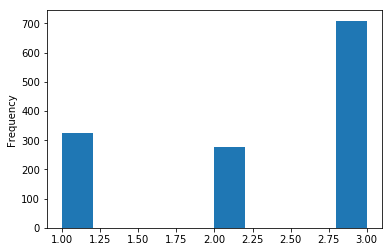

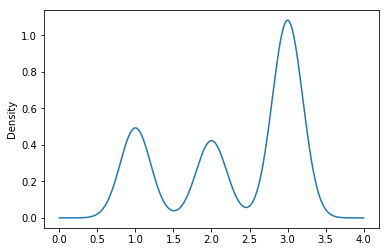

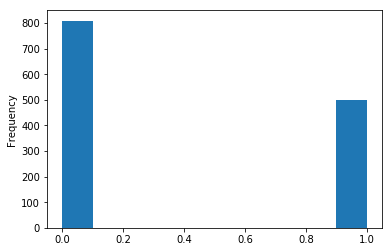

In [58]:
print(df.head(2))
df.pclass.plot(kind="hist")
plt.figure()
df.pclass.plot(kind="kde")
plt.figure()
df.survived.plot(kind="hist")

# Find total number of passengers between 0-30, 30-60 and 60 above

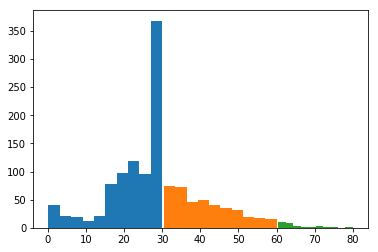

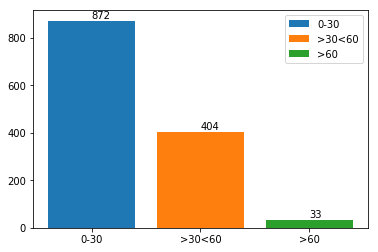

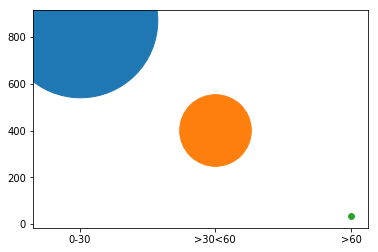

In [91]:
ag1 = df.age[df["age"]<=30]
ag2 = df.age[(df["age"]>30) & (df["age"]<=60)]
ag3 = df.age[(df["age"]>60)]
#print(ag3)
plt.hist(ag1)
plt.hist(ag2)
plt.hist(ag3)
plt.figure()
x = ["0-30",">30<60",">60"]
y = [ag1.size,ag2.size,ag3.size]
for i in range(len(x)):
    plt.bar(x[i],y[i],label=x[i])
    plt.text(x[i],y[i]+10,y[i])
plt.legend()
plt.figure()
for i in range(len(x)):
    plt.scatter(x[i],y[i],s=.01*np.pi*y[i]*y[i])
plt.show()

   pclass  survived  Gender      age  sibsp  parch      fare embarked
0       1         1  female  29.0000      0      0  211.3375        S
1       1         1    male   0.9167      1      2  151.5500        S
AxesSubplot(0.125,0.125;0.775x0.755)


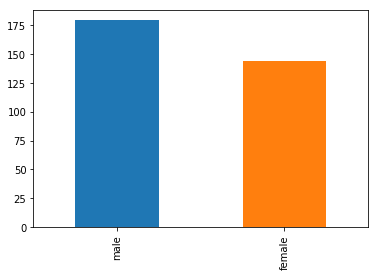

In [152]:
print(df.head(2))
grp1 = df.groupby("pclass")
#print(grp1.groups)
print(grp1.get_group(1).Gender.value_counts().plot(kind="bar"))

# Generate a BAR plot with number of passengers boarded from S,C and Q city in class-1

AxesSubplot(0.125,0.125;0.775x0.755)


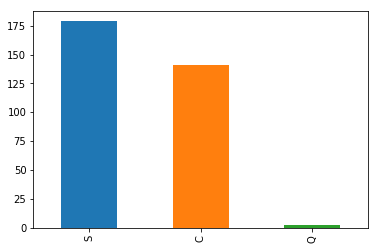

In [153]:
grp1 = df.groupby("pclass")
#print(grp1.groups)
print(grp1.get_group(1).embarked.value_counts().plot(kind="bar"))

# 1. Generate a list of Embarked city and their no. of passengers [using list comprehension]

# 2. Generate a bar plot for all these columns  survived  age  sibsp  parch      fare  w.r.t pclass-1

['S', 'C', 'Q']
[179, 141, 3]
[242, 28, 7]
[495, 101, 113]


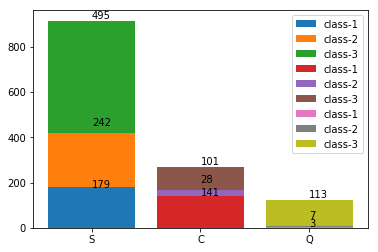

In [195]:
city_list = df.embarked.unique()
print(city_list.tolist())
df1 = grp1.get_group(1)
c1_num_pass_cnt = [grp1.get_group(1).embarked.value_counts()[x] for x in city_list]
print(c1_num_pass_cnt)
c2_num_pass_cnt = [grp1.get_group(2).embarked.value_counts()[x] for x in city_list]
print(c2_num_pass_cnt)
c3_num_pass_cnt = [grp1.get_group(3).embarked.value_counts()[x] for x in city_list]
print(c3_num_pass_cnt)
for i in range(len(city_list)):
    plt.bar(city_list[i],c1_num_pass_cnt[i],label="class-1")
    plt.text(city_list[i],c1_num_pass_cnt[i],c1_num_pass_cnt[i])
    
    plt.bar(city_list[i],c2_num_pass_cnt[i],bottom=c1_num_pass_cnt[i],label="class-2")
    plt.text(city_list[i],c1_num_pass_cnt[i]+c2_num_pass_cnt[i]+30,c2_num_pass_cnt[i])
    
    plt.bar(city_list[i],c3_num_pass_cnt[i],bottom=c2_num_pass_cnt[i]+c1_num_pass_cnt[i],label="class-3")
    plt.text(city_list[i],c1_num_pass_cnt[i]+c2_num_pass_cnt[i]+c3_num_pass_cnt[i]+10,c3_num_pass_cnt[i])
plt.legend()
plt.show()

   pclass  survived  Gender      age  sibsp  parch      fare embarked
0       1         1  female  29.0000      0      0  211.3375        S
1       1         1    male   0.9167      1      2  151.5500        S


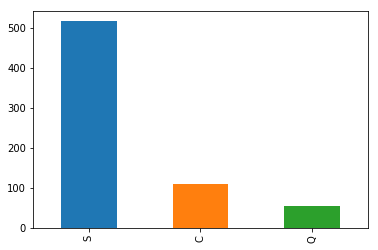

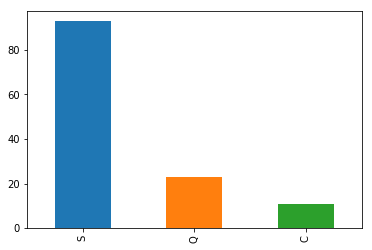

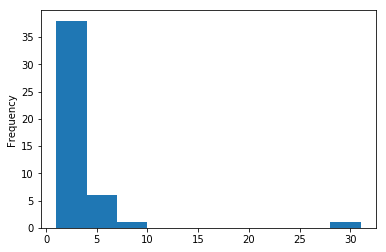

In [220]:
print(df.head(2))
grp2 = df.groupby(["survived","Gender"])
#print(grp2.groups)
grp2.get_group((0,"male")).embarked.value_counts().plot(kind="bar")
plt.figure()
grp2.get_group((0,"female")).embarked.value_counts().plot(kind="bar")
plt.figure()
grp2.get_group((0,"female")).age.value_counts().plot(kind="hist")

<Container object of 270 artists>

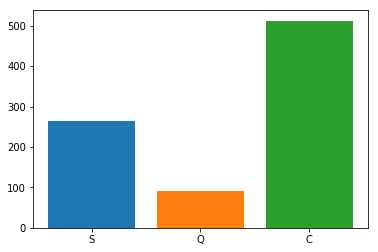

In [232]:
#print(df.head(2))
f1 = df.fare[df.embarked == "S"]
f2 = df.fare[df.embarked == "Q"]
f3 = df.fare[df.embarked == "C"]
plt.bar(df.embarked[df.embarked == "S"],f1)
plt.bar(df.embarked[df.embarked == "Q"],f2)
plt.bar(df.embarked[df.embarked == "C"],f3)